In [1]:
import os
import pickle
from tqdm import tqdm
from skimage.io import imread
from skimage.transform import resize
import numpy as np

import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# prepare data
DATADIR = '/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/'
CATEGORIES = ['Calm', 'Uncalm']
IMG_SIZE= 224

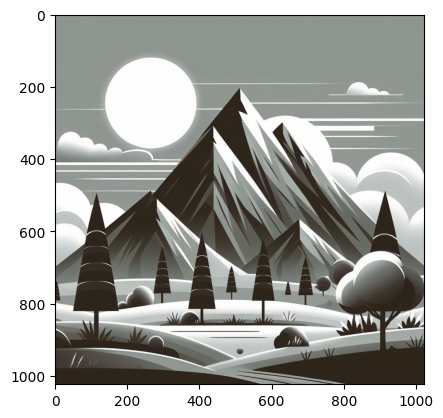

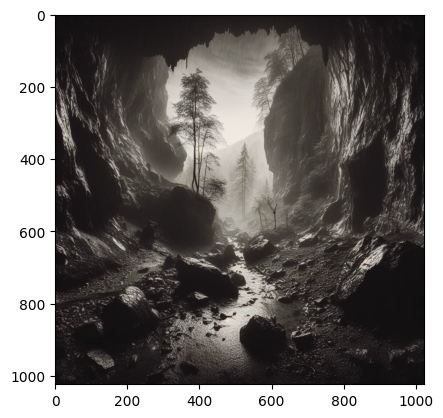

In [4]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        break
    #break

In [5]:
import glob
all_images = []
labels = []
for path in glob.glob("/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/"):
    label = path.split("/")[-1]
    for image_path in glob.glob(os.path.join(path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        image = cv2.resize(image, (100, 100))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        all_images.append(image)
        labels.append(label)
all_images = np.array(all_images)
labels = np.array(labels)

In [12]:
def plot_image_grid(images, nb_rows=10, nb_cols=2, figsize=(5, 5)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            # axs[i, j].xaxis.set_ticklabels([])
            # axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1

In [13]:
plot_image_grid(all_images[940:1010], 7, 10)

AssertionError: Number of images should be the same as (nb_rows*nb_cols)

In [8]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [9]:
print(len(training_data))

200


In [10]:
lenofimage = len(training_data)

In [14]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [15]:
X.shape

(200, 150528)

In [16]:
X = X/255.0

In [17]:
X[1]

array([0.68627451, 0.68627451, 0.63921569, ..., 0.27058824, 0.22352941,
       0.17647059])

In [18]:
y=np.array(y)

In [19]:
y.shape

(200,)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=21)

In [21]:
from sklearn.svm import SVC
svc = SVC(C = 1, kernel='rbf',gamma='auto')
svc.fit(X_train, y_train)

SVC(C=1, gamma='auto')

In [22]:
y2 = svc.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.7


In [24]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.71      0.63      0.67        19
           1       0.70      0.76      0.73        21

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40



In [25]:
import pandas as pd
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [26]:
result

,original,predicted
0,1,0
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,1
7,0,1
8,1,1
9,1,0


### Tuning Hyperparameter GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [1, 100],
              'gamma': [1, 0.01, 0.0001],
              'kernel': ['rbf','poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.500 total time=   7.5s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.500 total time=   5.4s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.500 total time=   4.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.500 total time=   5.9s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.469 total time=   5.3s
[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.656 total time=   3.3s
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.719 total time=   3.2s
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.812 total time=   4.5s
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.750 total time=   3.6s
[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.750 total time=   3.0s
[CV 1/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.500 total time=   3.3s
[CV 2/5] END ......C=1, gamma=1, kernel=sigmoid;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 100], 'gamma': [1, 0.01, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [28]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}


In [29]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=1, gamma=0.0001, kernel='poly')


In [30]:
test_predictions = grid.predict(X_test)
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with SVM: {0:.6f}".format(precision))

Accuracy with SVM: 77.500000


In [31]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.7


In [32]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.71      0.63      0.67        19
           1       0.70      0.76      0.73        21

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40



In [33]:
import pandas as pd
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [34]:
result

,original,predicted
0,1,0
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,1
7,0,1
8,1,1
9,1,0


In [35]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 10],
              'gamma': [1, 0.01, 0.0001],
              'kernel': ['rbf','poly', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   6.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   4.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   3.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   5.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.469 total time=   5.5s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.656 total time=   3.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.719 total time=   3.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.812 total time=   4.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.750 total time=   3.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.750 total time=   3.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.500 total time=   3.3s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10], 'gamma': [1, 0.01, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [36]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [37]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=10, gamma=0.0001)


In [38]:
test_predictions = grid.predict(X_test)
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with SVM: {0:.6f}".format(precision))

Accuracy with SVM: 77.500000


In [44]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.7


In [40]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.71      0.63      0.67        19
           1       0.70      0.76      0.73        21

    accuracy                           0.70        40
   macro avg       0.70      0.70      0.70        40
weighted avg       0.70      0.70      0.70        40



In [48]:
import pandas as pd
result = pd.DataFrame({'original' : y_test,'predicted' : y2})


In [42]:
result

,original,predicted
0,1,0
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,1
7,0,1
8,1,1
9,1,0
